# Assignment data and distributions

For this assignment I am using data from Fitbit and a survey from a French study. The analysis and visualizations are made with Pandas, Matplotlib and the Seaborn library. 

## Tables of survey and steps data

In [5]:
# Import the libraries we use for our data visualization
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Open the first dataset we are going to use (steps.csv)
df1 = pd.read_csv('steps.csv', sep=";", )# Show steps.csv in a table
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Open the second dataset we are going to use (survey.csv)
df2 = pd.read_csv('survey.csv')# Show steps.csv in a table
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [9]:
# Merge the two datasets
df = pd.merge(df1, df2, on = 'id') # show merged survey.csv and steps.csv in one table based on 'id' as common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [125]:
# Apply a function to all elements
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

# Delete strange weight values (> 250 kg)
def above_250(x):
    if(x > 205.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_250)

In [127]:
# Show all participants' steps per year
df_years = df.loc[:,"20-6-2013":"13-5-2014"]
df_years.head()

,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis: height of all participants 

Statistical values:
Mean height: 171.66810344827587
Median height: 172.0
Mode height: 0    170.0
dtype: float64
Variance height: 82.45067514786287
Standard deviation height: 9.080235412579503


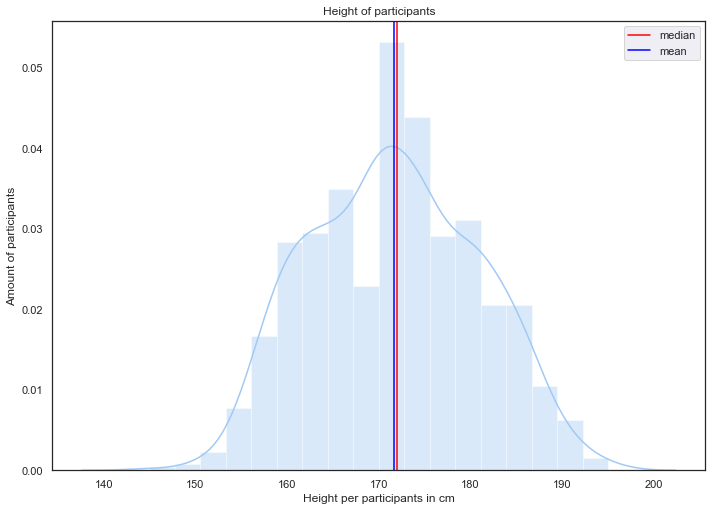

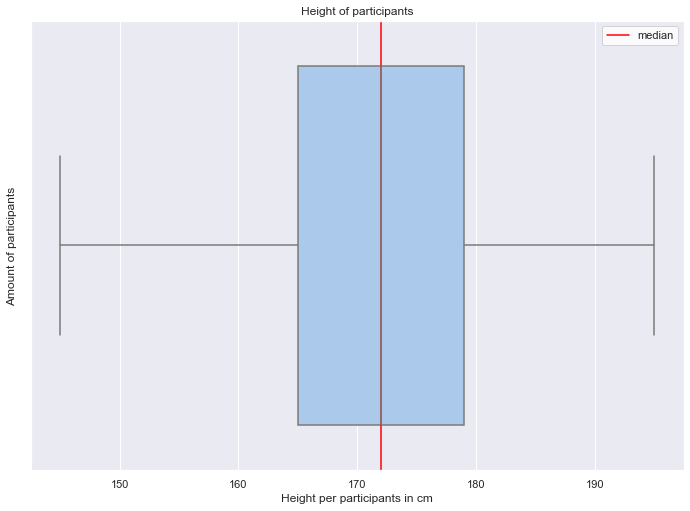

In [181]:
# Calculate statistical values for height
mean_height = df['height'].mean()
median_height = df['height'].median()
mode_height = df['height'].mode()
variance_height = df['height'].var()
std_height = df['height'].std()

#Print all statistical values for height
print('Statistical values:')
print(f'Mean height: {mean_height}')
print(f'Median height: {median_height}')
print(f'Mode height: {mode_height}')
print(f'Variance height: {variance_height}')
print(f'Standard deviation height: {std_height}')

# Make height as a variable
df_height = df['height']

# Create a histogram with median and mean highlighted + kernel density estimation
sns.distplot(df_height.dropna(), kde=True)
plt.title('Height of participants')
sns.set_style("darkgrid")

# Add labels
plt.xlabel('Height per participants in cm')
plt.ylabel('Amount of participants')

       
# Add line for the median
plt.axvline(median_height, 0, 100, color='red', label='median')

# Add line for mean
plt.axvline(mean_height, 0, 100, color='blue', label='mean') 
    

# Add a legend to the histogram
plt.legend()

# Make histogram visible
plt.show()


# Make a box plot
sns.set_palette("pastel")
sns.boxplot(df_height.dropna())
plt.title('Height of participants')
sns.set_style("white")

# Add line for the median
plt.axvline(median_height, 0, 100, color='red', label='median')

# Add a legend to the histogram
plt.legend()

# Add labels
plt.xlabel('Height per participants in cm')
plt.ylabel('Amount of participants')



# Show box plot
plt.show()





### Summary


* If we look at the peak, we can conclude that most participants were 170 cm long
* If we look at the tail, the tail is on the left. This means that the median is higher than the mean and that's true if we look at the position of the median (red) and mean (blue)
* If we look at the Kernel Density Estimate, we can see that participants have a height between 150 and 195 cm.
* The box plot shows a summary of the most frequent heights in cm based on the median. 


## Time series: mean steps per year

In [132]:
# Calculate the mean for steps per year
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean() 
# Show the index of mean_steps
mean_steps.index 


Index(['20-6-2013', '21-6-2013', '22-6-2013', '23-6-2013', '24-6-2013',
       '25-6-2013', '26-6-2013', '27-6-2013', '28-6-2013', '29-6-2013',
       ...
       '4-5-2014', '5-5-2014', '6-5-2014', '7-5-2014', '8-5-2014', '9-5-2014',
       '10-5-2014', '11-5-2014', '12-5-2014', '13-5-2014'],
      dtype='object', length=328)

In [180]:
#Print all statistical values for height
print('Statistical values:')
print(f'Mean steps: {mean_steps.dropna()}')


Statistical values:
Mean steps: 20-6-2013     3642.416667
21-6-2013     9034.724280
22-6-2013    10889.636691
23-6-2013     7402.847973
24-6-2013     8110.370056
                 ...     
8-5-2014      7209.693878
9-5-2014      9570.690141
10-5-2014     7614.848837
11-5-2014     6805.925926
12-5-2014     7505.530303
Length: 327, dtype: float64


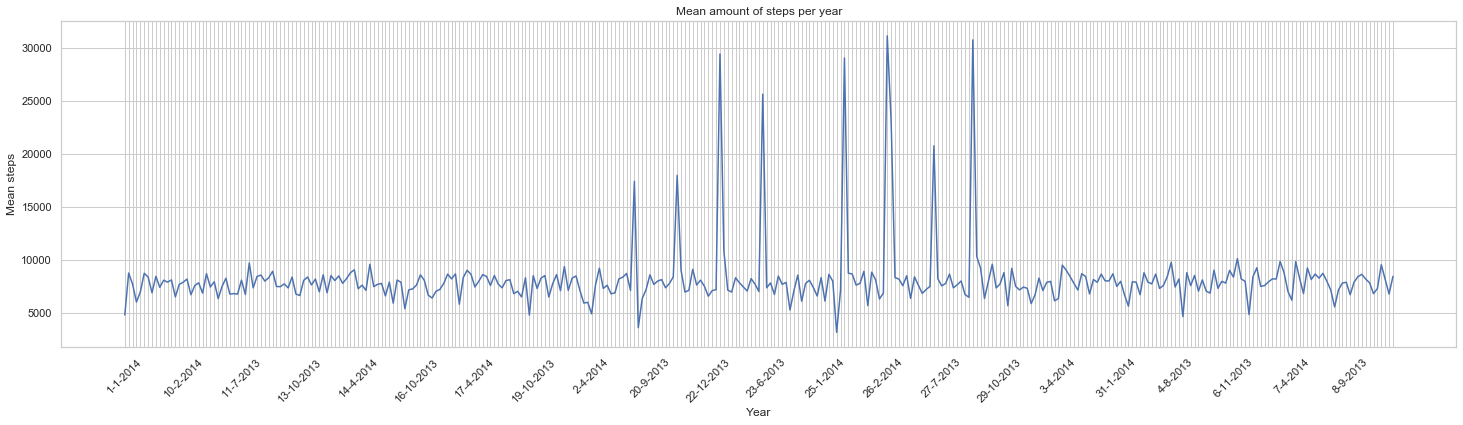

In [177]:
# Set style and add x-lines
sns.set_style("whitegrid")

# Create graph layout so it fits the page correctly
plt.figure(figsize=(25, 6)) 

# Show times series of mean steps per year in a lineplot
plot = sns.lineplot(x=mean_steps.index, y=mean_steps)

# Minimize x-labels because otherwise there are too many year-labels overlapping
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 15 == 0:  
                label.set_visible(True)
    else:
        label.set_visible(False)

# Rotate the x-axis notation
plt.xticks(rotation=45)



# Set labels
plt.title('Mean amount of steps per year')
plt.xlabel("Year") 
plt.ylabel("Mean steps") 


# Show time series
plt.show() 
